In [1]:
import numpy as np
from scipy import *

# 1. Special function

In [10]:
%matplotlib inline
from scipy.special import jn, yn, jn_zeros, yn_zeros
import matplotlib.pyplot as plt

In [12]:
n = 0
X = 0.0

print("J_%d(%f) = %f" % (n, X, jn(n,X)))

J_0(0.000000) = 1.000000


In [13]:
X = 1.0
print("Y_%d(%f) = %f" % (n,X,yn(n,X)))

Y_0(1.000000) = 0.088257


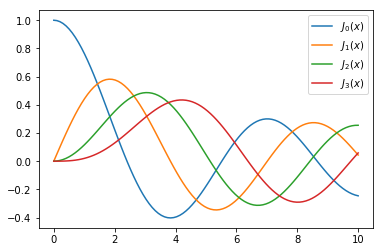

In [16]:
X = linspace(0,10,100)
fig, ax = plt.subplots()
for n in range(4):
    ax.plot(X,jn(n,X),label=r"$J_%d(x)$" % n)
ax.legend();


In [17]:
n = 0
m = 4
jn_zeros(n,m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

# 2. Integrate

In [18]:
from scipy.integrate import quad, dblquad, tplquad

In [19]:
def f(x):
    return x

In [22]:
x_lower = 0
x_upper = 1

val, abserr = quad(f,x_lower,x_upper)
print("integrate value = %f, absolute error = %e" % (val, abserr))

integrate value = 0.500000, absolute error = 5.551115e-15


In [23]:
def integrand(x, n):
    # Bessel function of first ind and order n.
    return jn(n, x)

In [24]:
x_lower = 0
x_upper = 10

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))
print(val, abserr)

0.7366751370811073 9.389126882496405e-13


In [29]:
val, abserr = quad(lambda x: exp(-x**2), -Inf, Inf)

print("numerical = ",val ,abserr)

numerical =  1.7724538509055159 1.4202636781830878e-08


In [31]:
analytical = sqrt(pi)
print("analytical = ", analytical)

analytical =  1.77245385091


In [32]:
def integrand(x,y):
    return exp(-x**2 - y**2)

In [37]:
x_lower = 0
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x: y_lower, lambda x: y_upper)
print(val, abserr)

0.7853981633974476 1.375309851021853e-08


# 3. Ordinary differential equation (ODEs)

In [38]:
from scipy.integrate import odeint, ode

## Example1: 双摆

In [44]:
g = 9.82
L = 0.5
m = 0.1

def dx(X, t):
    # The right-hand side of the pendulum ODE
    x1, x2, x3, x4 = X[0], X[1], X[2], X[3]
    dx1 = 6.0/(m*L**2) * (2*x3 - 3*cos(x1-x2)*x4)/(16-9*cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

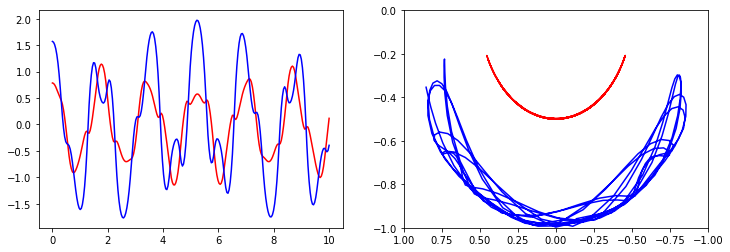

In [58]:
X0 = [pi/4, pi/2, 0, 0]
t = linspace(0, 10, 250)
X = odeint(dx, X0, t)

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(t, X[:,0], 'r', label="theta1")
axes[0].plot(t, X[:,1], 'b', label="theta2")


x1 = + L * sin(X[:,0])
y1 = - L * cos(X[:,0])
x2 = x1 + L * sin(X[:,1])
y2 = y1 - L * cos(X[:,1])

axes[1].plot(x1, y1, 'r', label="pendumlum1")
axes[1].plot(x2, y2, 'b', label="pendumlum2")
axes[1].set_ylim([-1,0])
axes[1].set_xlim([1,-1]);


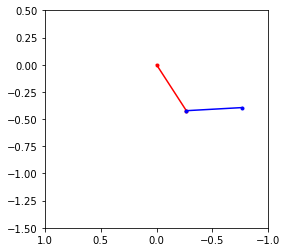

In [71]:
from IPython.display import display,clear_output
import time

fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):
    x1 = + L * sin(X[t_idx, 0])
    y1 = - L * cos(X[t_idx, 0])
    
    x2 = x1 + L * sin(X[t_idx, 1])
    y2 = y1 - L * cos(X[t_idx, 1])
    
    ax.cla()
    ax.plot([0,x1], [0,y1], 'r.-')
    ax.plot([x1,x2], [y1,y2], 'b.-')
    ax.set_ylim([-1.5,0.5])
    ax.set_xlim([1,-1])
    
    display(fig)
    clear_output()
    
    time.sleep(0.1)


## Example2: 阻尼谐振子

In [72]:
def dy(y, t, zeta ,w0):
    # The right-hand side of the damped oscillator ODE
    x, p = y[0], y[1]
    
    dx = p
    dp = -2*zeta*w0*p - w0**2*x
    return [dx, dp]

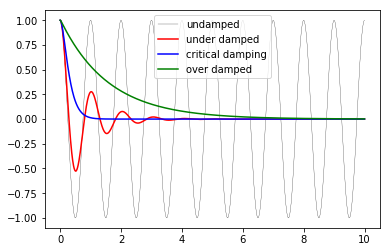

In [73]:
y0 = [1.0, 0.0]

t = linspace(0,10,1000)
w0 = 2*pi*1.0

y1 = odeint(dy, y0, t, args=(0.0, w0))
y2 = odeint(dy, y0, t, args=(0.2, w0))
y3 = odeint(dy, y0, t, args=(1.0, w0))
y4 = odeint(dy, y0, t, args=(5.0, w0))

fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label="critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend()


# 4. Fourier trandform (FFT)

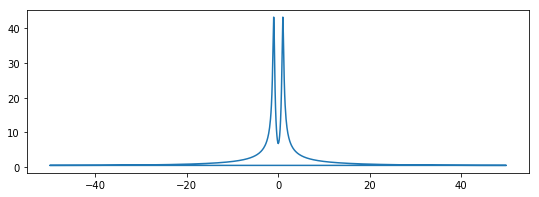

In [85]:
from scipy.fftpack import *

N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0])

w = fftfreq(N, dt)

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F))


(0, 5)

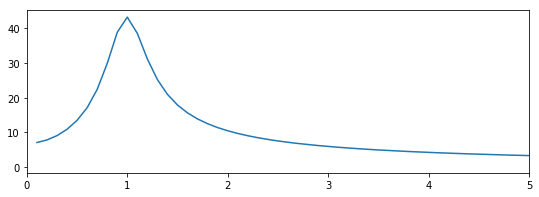

In [97]:
indices = where(w>0)

w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0,5)


# 5. Linear algebra

## System of linear equations

In [98]:
from scipy.linalg import *
from numpy.random import *

In [99]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

x = solve(A, b)
x

D:\Program Soft\Anaconda\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2028234615578505e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


array([-0.23333333,  0.46666667,  0.1       ])

In [100]:
# Check
dot(A, x) - b

array([  0.00000000e+00,  -2.22044605e-16,   0.00000000e+00])

In [101]:
A = rand(3,3)
B = rand(3,3)

X = solve(A,B)
X

array([[ 1.24283408,  1.37443608, -0.01961828],
       [ 1.10559079,  1.06549254,  0.12512179],
       [-1.07207787, -1.13485648,  0.90835663]])

In [102]:
# Check
norm(dot(A,X) - B)

3.5975337699988621e-16

## Eigen values & Eigen vectors

In [103]:
evals =eigvals(A)
evals

array([ 1.80825881+0.j, -0.46534950+0.j,  0.40942754+0.j])

In [105]:
evals, evecs = eig(A)
evals

array([ 1.80825881+0.j, -0.46534950+0.j,  0.40942754+0.j])

In [106]:
evecs

array([[-0.61577181, -0.85670465, -0.20086224],
       [-0.34087181,  0.359722  , -0.65106943],
       [-0.71037419,  0.36967178,  0.7319583 ]])

## Matrix operations

In [108]:
# the matrix inverse
inv(A)

array([[-1.13662769,  1.78684079,  0.60721893],
       [ 0.89964847,  1.03054621, -1.00898094],
       [ 0.56221381, -1.84836766,  0.95261182]])

In [109]:
# determinant
det(A)

-0.34452195222316995

In [111]:
# norms of various orders
norm(A, ord=2), norm(A, ord=Inf)

(1.8737687542939025, 2.1141390398487614)

## Sparse matrix

In [112]:
from scipy.sparse import *

In [113]:
# dense matrix
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]])
M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [114]:
# convert from dense to sparse
A = csr_matrix(M)
A

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 6 stored elements in Compressed Sparse Row format>

In [115]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int32)

In [116]:
A = lil_matrix((4,4))
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [117]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [118]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [119]:
A = csr_matrix(A)
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [120]:
A = csc_matrix(A)
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [121]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [122]:
(A*A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [123]:
dot(A,A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [124]:
v = array([1,2,3,4])[:,newaxis]
v

array([[1],
       [2],
       [3],
       [4]])

In [125]:
# sparse matrix - dense vector multiplication
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [ ]:
# same result with dense matrix - dense vector multiplication

In [126]:
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

# 6. Optimization

In [128]:
from scipy import optimize

In [129]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

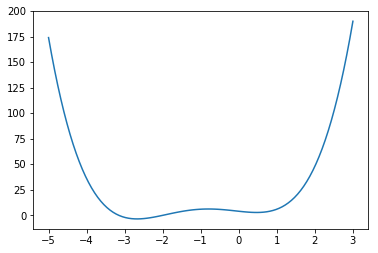

In [130]:
fig, ax = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x))

In [132]:
x_min = optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298155])

In [135]:
optimize.fmin_bfgs(f, 0.5)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

In [136]:
# brent
optimize.brent(f)

0.46961743402759754

In [137]:
# fminbound
optimize.fminbound(f, -4, 2)

-2.6729822917513886

## find the solves of equation

In [140]:
omega_c = 3.0
def f(omega):
    return tan(2*pi*omega) - omega_c/omega

D:\Program Soft\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


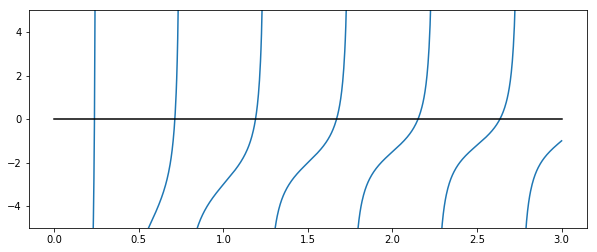

In [143]:
fig, ax = plt.subplots(figsize=(10,4))
x = linspace(0,3,1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN    # get rid of vertical line when the function flip sign

ax.plot(x,y)
ax.plot([0,3], [0,0], 'k')
ax.set_ylim(-5,5);

D:\Program Soft\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


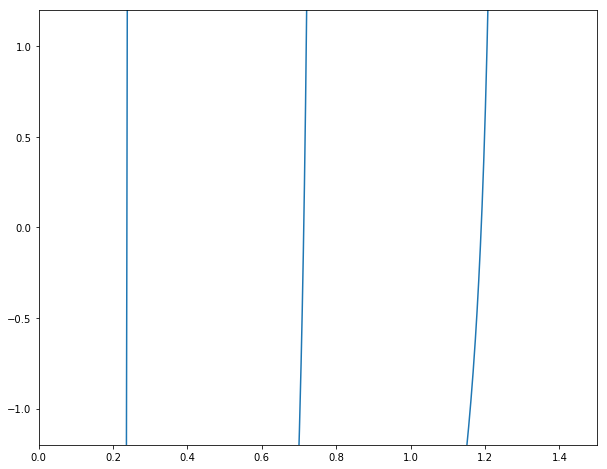

In [161]:
fig, ax = plt.subplots(figsize=(10,8))
x = linspace(0,1.5,1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN    # get rid of vertical line when the function flip sign

ax.plot(x,y)
ax.set_xlim(0,1.5)
ax.set_ylim(-1.2,1.2);

In [157]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [158]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [159]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

# 7. Interpolation

In [162]:
from scipy.interpolate import *

In [163]:
def f(x):
    return sin(x)

In [164]:
n = arange(0,10)
x = linspace(0,9,100)

y_meas = f(n) + 0.1*randn(len(n))    # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)


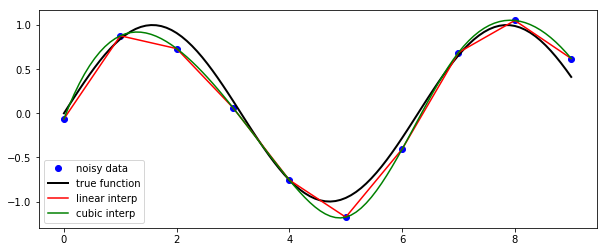

In [173]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bo', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3)

# 8. Statistics

In [174]:
from scipy import stats

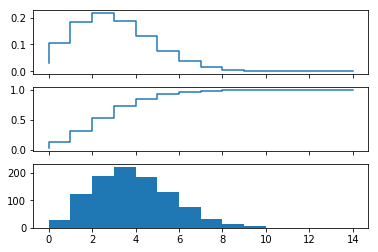

In [176]:
# create a discrete random variable with poissionian distribution
X = stats.poisson(3.5)    # photon distribution for a coherent state with n=3.5 photons

n = arange(0,15)

fig, axes = plt.subplots(3,1,sharex=True)
# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))
# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))
# plot histogram of 1000 random realizations of the stochastics variable X
axes[2].hist(X.rvs(size=1000));

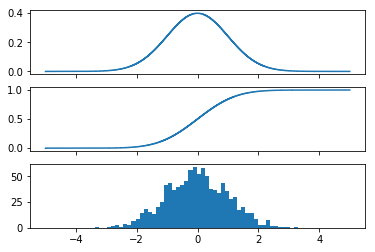

In [184]:
# create a continues random variable with normal distribution
Y = stats.norm()

x = linspace(-5,5,1000)

fig, axes = plt.subplots(3,1,sharex=True)
# plot the probability distribution function (PDF)
axes[0].step(x, Y.pdf(x))
# plot the commulative distribution function (CDF)
axes[1].step(x, Y.cdf(x))
# plot histogram of 1000 random realizations of the stochastics variable X
axes[2].hist(Y.rvs(size=1000), bins=50);

In [185]:
# statistics
X.mean(), X.std(), X.var()   # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [186]:
Y.mean(), Y.std(), Y.var()   # normal distribution

(0.0, 1.0, 1.0)

## statistics test

In [188]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))
print("t-statistic = ", t_statistic)
print("p-value = ", p_value)

t-statistic =  0.34461934298
p-value =  0.730416831701


In [189]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-2.9326963004359192, pvalue=0.0034370237893733432)

In [190]:
Y.mean()

0.0

In [191]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=-1.0829337891743389, pvalue=0.27909912093898298)